In [1]:
%load_ext autoreload
%autoreload 2
from util import util
import numpy as np

/opt/miniconda2/envs/py36h2o/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# train signals
%store -r signal_3_1_hor
%store -r signal_3_2_hor
%store -r signal_3_1_vert
%store -r signal_3_2_vert

# test signals
%store -r signal_3_3_hor
%store -r signal_3_3_vert

hor_train = [signal_3_1_hor, signal_3_2_hor]
vert_train = [signal_3_1_vert, signal_3_2_vert]

hor_test = [signal_3_3_hor]
vert_test = [signal_3_3_vert]

spectros_train_hor = [util.getSpectro(signal) for signal in hor_train]
spectros_train_vert = [util.getSpectro(signal) for signal in vert_train]

spectros_test_hor = [util.getSpectro(signal) for signal in hor_test]
spectros_test_vert = [util.getSpectro(signal) for signal in vert_test]

In [3]:
# parameters
layersizes = [500,200,50]
expName = 'b3_hor_vert'

### bepaal X en Y voor trainen

In [4]:
X_train = np.concatenate((np.concatenate(spectros_train_hor, axis=0),
                          np.concatenate(spectros_train_vert, axis=0)), 
                          axis=1)
print(np.shape(X_train))

Y_train = []
for spectro in spectros_train_hor:
    nr_samples = len(spectro)
    Y_train_nw = np.array([10 * (nr_samples - i) for i in range(1, nr_samples +1)])
    Y_train = np.append(Y_train, Y_train_nw)
    
print(np.shape(Y_train))

(2152, 2562)
(2152,)


## train modellen

Epoch 1/100
2152/2152 [==============================] - 3s 2ms/step - loss: 69675828.4312
Epoch 2/100
2152/2152 [==============================] - 2s 1ms/step - loss: 58580393.8996
Epoch 3/100
2152/2152 [==============================] - 2s 1ms/step - loss: 27435553.6059
Epoch 4/100
2152/2152 [==============================] - 3s 1ms/step - loss: 23640734.8401
Epoch 5/100
2152/2152 [==============================] - 3s 1ms/step - loss: 23487376.7658
Epoch 6/100
2152/2152 [==============================] - 2s 1ms/step - loss: 23371294.9219
Epoch 7/100
2152/2152 [==============================] - 2s 1ms/step - loss: 23304249.6283
Epoch 8/100
2152/2152 [==============================] - 2s 1ms/step - loss: 23150471.3532
Epoch 9/100
2152/2152 [==============================] - 3s 1ms/step - loss: 23054366.8178
Epoch 10/100
2152/2152 [==============================] - 2s 1ms/step - loss: 22987122.4981
Epoch 11/100
2152/2152 [==============================] - 3s 1ms/step - loss: 22890384.71

2152/2152 [==============================] - 2s 1ms/step - loss: 4870596.6041
Epoch 91/100
2152/2152 [==============================] - 2s 1ms/step - loss: 4474806.4257
Epoch 92/100
2152/2152 [==============================] - 2s 1ms/step - loss: 4617067.6320
Epoch 93/100
2152/2152 [==============================] - 2s 1ms/step - loss: 4093974.2621
Epoch 94/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3955797.7398
Epoch 95/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3792162.1896
Epoch 96/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3684535.5762
Epoch 97/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3539623.1231
Epoch 98/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3434847.7268
Epoch 99/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3313471.4582
Epoch 100/100
2152/2152 [==============================] - 2s 1ms/step - loss: 3134789.6394


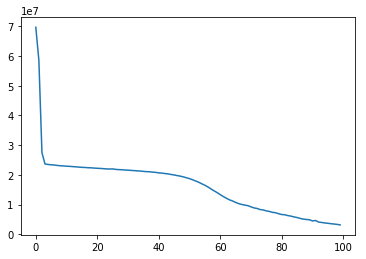

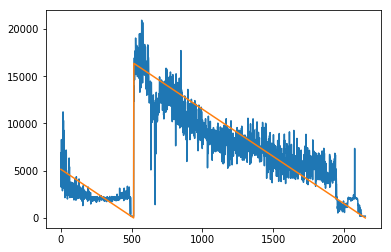

In [5]:
rulModel, history = util.trainModel(X_train, Y_train, layersizes, 100, expName)

Epoch 1/500
2152/2152 [==============================] - 3s 1ms/step - loss: 69711748.5353
Epoch 2/500
2152/2152 [==============================] - 3s 1ms/step - loss: 59136868.3717
Epoch 3/500
2152/2152 [==============================] - 3s 1ms/step - loss: 27316331.2268
Epoch 4/500
2152/2152 [==============================] - 3s 1ms/step - loss: 23691408.8030
Epoch 5/500
2152/2152 [==============================] - 3s 1ms/step - loss: 23487062.0223
Epoch 6/500
2152/2152 [==============================] - 2s 1ms/step - loss: 23375132.1784
Epoch 7/500
2152/2152 [==============================] - 2s 1ms/step - loss: 23270015.1078
Epoch 8/500
2152/2152 [==============================] - 2s 1ms/step - loss: 23148326.4981
Epoch 9/500
2152/2152 [==============================] - 2s 1ms/step - loss: 23049083.0335
Epoch 10/500
2152/2152 [==============================] - 2s 1ms/step - loss: 23017971.8959
Epoch 11/500
2152/2152 [==============================] - 2s 1ms/step - loss: 22919279.19

2152/2152 [==============================] - 2s 1ms/step - loss: 5182489.3550
Epoch 91/500
2152/2152 [==============================] - 2s 1ms/step - loss: 4961654.4870
Epoch 92/500
2152/2152 [==============================] - 2s 1ms/step - loss: 4755316.8383
Epoch 93/500
2152/2152 [==============================] - 2s 1ms/step - loss: 4568121.1041
Epoch 94/500
2152/2152 [==============================] - 2s 1ms/step - loss: 4340903.0260
Epoch 95/500
2152/2152 [==============================] - 2s 1ms/step - loss: 4276204.7677
Epoch 96/500
2152/2152 [==============================] - 2s 1ms/step - loss: 4022543.5037
Epoch 97/500
2152/2152 [==============================] - 2s 1ms/step - loss: 3921517.0834
Epoch 98/500
2152/2152 [==============================] - 2s 1ms/step - loss: 3734664.5186
Epoch 99/500
2152/2152 [==============================] - 2s 1ms/step - loss: 3540570.3178
Epoch 100/500
2152/2152 [==============================] - 2s 1ms/step - loss: 3510862.6812
Epoch 101/5

2152/2152 [==============================] - 2s 1ms/step - loss: 1560707.9470
Epoch 180/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1459920.8806
Epoch 181/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1499307.5994
Epoch 182/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1465065.2546
Epoch 183/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1451298.0443
Epoch 184/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1436010.3731
Epoch 185/500
2152/2152 [==============================] - 3s 1ms/step - loss: 1522461.7119
Epoch 186/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1437334.2760
Epoch 187/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1437827.6543
Epoch 188/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1423648.5530
Epoch 189/500
2152/2152 [==============================] - 2s 1ms/step - loss: 1411327.4883
Ep

2152/2152 [==============================] - 2s 1ms/step - loss: 908455.4765
Epoch 269/500
2152/2152 [==============================] - 2s 1ms/step - loss: 883478.6896
Epoch 270/500
2152/2152 [==============================] - 2s 1ms/step - loss: 872563.7040
Epoch 271/500
2152/2152 [==============================] - 2s 1ms/step - loss: 858492.5046
Epoch 272/500
2152/2152 [==============================] - 2s 1ms/step - loss: 879678.4398
Epoch 273/500
2152/2152 [==============================] - 2s 1ms/step - loss: 862700.6908
Epoch 274/500
2152/2152 [==============================] - 2s 1ms/step - loss: 856339.0711
Epoch 275/500
2152/2152 [==============================] - 2s 1ms/step - loss: 895275.5789
Epoch 276/500
2152/2152 [==============================] - 2s 1ms/step - loss: 835245.8213
Epoch 277/500
2152/2152 [==============================] - 2s 1ms/step - loss: 825020.3659
Epoch 278/500
2152/2152 [==============================] - 2s 1ms/step - loss: 824709.0802
Epoch 279/500

2152/2152 [==============================] - 2s 1ms/step - loss: 609235.9363
Epoch 359/500
2152/2152 [==============================] - 2s 1ms/step - loss: 661685.5960
Epoch 360/500
2152/2152 [==============================] - 2s 1ms/step - loss: 604198.9029
Epoch 361/500
2152/2152 [==============================] - 2s 1ms/step - loss: 582739.5146
Epoch 362/500
2152/2152 [==============================] - 2s 1ms/step - loss: 585122.4789
Epoch 363/500
2152/2152 [==============================] - 2s 1ms/step - loss: 598674.7707
Epoch 364/500
2152/2152 [==============================] - 2s 1ms/step - loss: 574728.2657
Epoch 365/500
2152/2152 [==============================] - 2s 1ms/step - loss: 568302.0215
Epoch 366/500
2152/2152 [==============================] - 2s 1ms/step - loss: 572486.3081
Epoch 367/500
2152/2152 [==============================] - 2s 1ms/step - loss: 616227.8341
Epoch 368/500
2152/2152 [==============================] - 2s 1ms/step - loss: 618056.7681
Epoch 369/500

2152/2152 [==============================] - 2s 1ms/step - loss: 438943.4540
Epoch 449/500
2152/2152 [==============================] - 2s 1ms/step - loss: 421583.1229
Epoch 450/500
2152/2152 [==============================] - 2s 1ms/step - loss: 475302.7597
Epoch 451/500
2152/2152 [==============================] - 2s 1ms/step - loss: 431898.9654
Epoch 452/500
2152/2152 [==============================] - 2s 1ms/step - loss: 418923.8887
Epoch 453/500
2152/2152 [==============================] - 2s 1ms/step - loss: 435782.7099
Epoch 454/500
2152/2152 [==============================] - 2s 1ms/step - loss: 466009.0134
Epoch 455/500
2152/2152 [==============================] - 2s 1ms/step - loss: 419962.6271
Epoch 456/500
2152/2152 [==============================] - 2s 1ms/step - loss: 433773.9648
Epoch 457/500
2152/2152 [==============================] - 2s 1ms/step - loss: 447800.4712
Epoch 458/500
2152/2152 [==============================] - 2s 1ms/step - loss: 457835.3118
Epoch 459/500

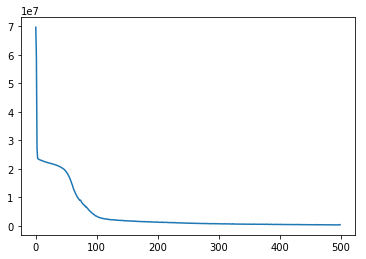

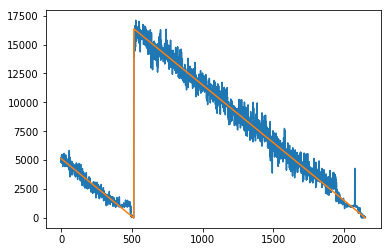

In [6]:
rulModel, history = util.trainModel(X_train, Y_train, layersizes, 500, expName)

## test modellen

352/352 [==============================] - 0s 293us/step


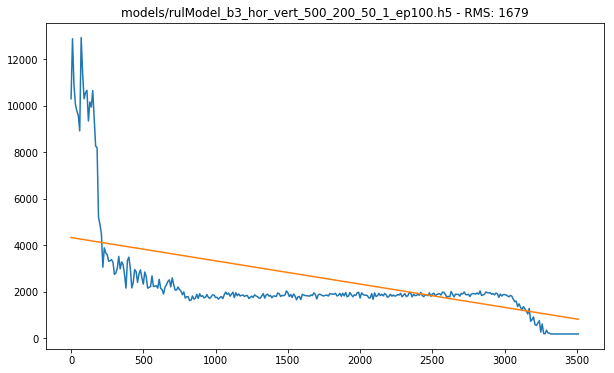

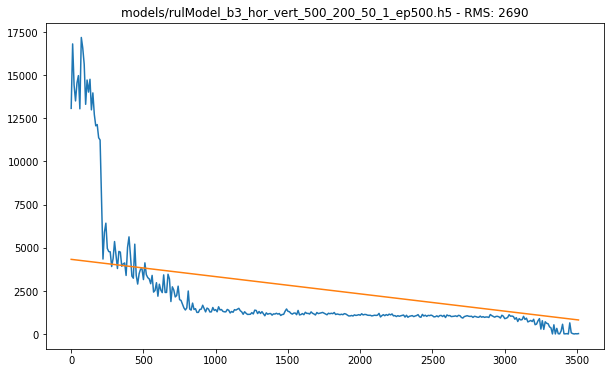

In [7]:
testnr = 3
actRUL =  820
testIndex = testnr - 3
testSpectro = np.concatenate((spectros_test_hor[testIndex], spectros_test_vert[testIndex]), axis=1)
modelnames = [util.getModelName(layersizes, 100, expName), util.getModelName(layersizes, 500, expName)]
util.evaluate_spectro(modelnames, testSpectro, actRUL)